## **Plant Disease Detection Using Deep Learning models**

### 1. Importing Libraries
Importing all the necessary libraries.

In [ ]:
!pip install tensorflow keras numpy pandas opencv-python matplotlib seaborn scikit-learn albumentations torch torchvision fastapi optuna shap limelime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 8.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.3/80.3 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.0/66.0 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 573.6 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.0/63.0 MB 15.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 290.6/290.6 kB 20.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.6/383.6 kB 24.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 972.6/972.6 kB 32.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.8/231.8 kB 16

In [ ]:
import os
os._exit(00)

In [ ]:
import tensorflow as tf
print("Num GPUs Available:", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available: 1


In [ ]:
from tensorflow.keras import mixed_precision
mixed_precision.set_global_policy("mixed_float16")

### 2. Loading Dataset
Loading the required Dataset as Dataframe.

In [ ]:
import os
import cv2
import numpy as np

dataset_path = "drive/My Drive/archive/PlantVillage"
print("Dataset Path:", dataset_path)

classes = os.listdir(dataset_path)
num_classes = len(classes)
class_map = {cls: i for i, cls in enumerate(classes)}
print("Class Map:", class_map)

X, y = [], []
valid_extensions = ('.jpg', '.jpeg', '.png')

for category in classes:
    category_path = os.path.join(dataset_path, category)

    for img_name in os.listdir(category_path):
        img_path = os.path.join(category_path, img_name)

        if not img_name.lower().endswith(valid_extensions):
            print(f"Skipping non-image file: {img_path}")
            continue

        img = cv2.imread(img_path)
        if img is None:
            print(f"Skipping corrupted file: {img_path}")
            continue

        img = cv2.resize(img, (64, 64))
        X.append(img)
        y.append(class_map[category])

X = np.array(X)
y = np.array(y)

print("Data loaded successfully!")
print(f"Total images: {len(X)}, Total labels: {len(y)}")

Dataset Path: drive/My Drive/archive/PlantVillage
Class Map: {'Tomato__Tomato_YellowLeaf__Curl_Virus': 0, 'Tomato_Septoria_leaf_spot': 1, 'Tomato_Bacterial_spot': 2, 'Tomato_Early_blight': 3, 'Tomato__Tomato_mosaic_virus': 4, 'Tomato_healthy': 5, 'Tomato__Target_Spot': 6, 'Tomato_Late_blight': 7, 'Tomato_Spider_mites_Two_spotted_spider_mite': 8, 'Tomato_Leaf_Mold': 9, 'Pepper__bell___Bacterial_spot': 10, 'Pepper__bell___healthy': 11, 'PlantVillage': 12, 'Potato___Late_blight': 13, 'Potato___healthy': 14, 'Potato___Early_blight': 15}
Skipping non-image file: drive/My Drive/archive/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/svn-r6Yb5c
Skipping non-image file: drive/My Drive/archive/PlantVillage/PlantVillage/Tomato__Target_Spot
Skipping non-image file: drive/My Drive/archive/PlantVillage/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus
Skipping non-image file: drive/My Drive/archive/PlantVillage/PlantVillage/Tomato__Tomato_mosaic_virus
Skipping non-image file: drive/My Drive/arc

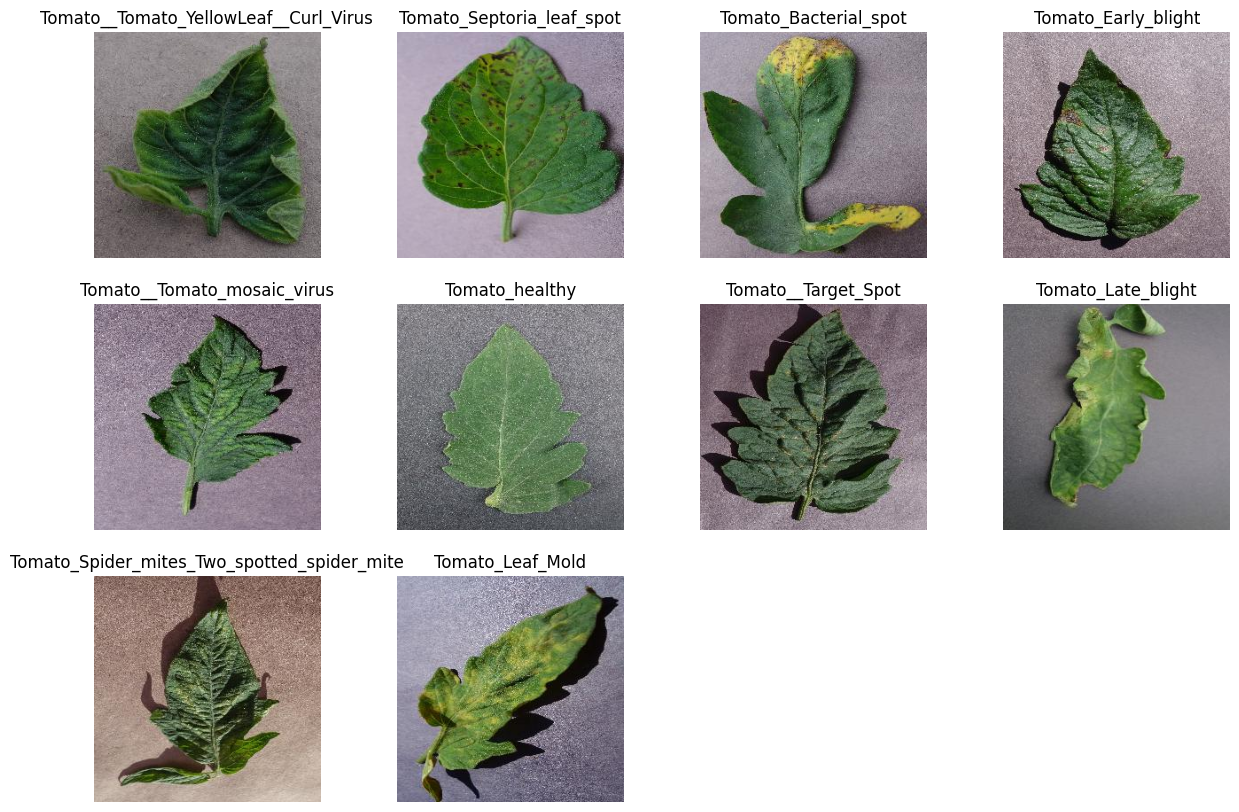

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(3, 4, figsize=(15, 10))
for i, category in enumerate(classes[:10]):
    img_path = os.path.join(dataset_path, category, os.listdir(os.path.join(dataset_path, category))[0])
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    ax[i//4, i%4].imshow(img)
    ax[i//4, i%4].set_title(category)
    ax[i//4, i%4].axis("off")
for i in range(10, 12):
    row, col = divmod(i, 4)
    fig.delaxes(ax[row, col])
plt.show()


### 3. Dataset Distribution

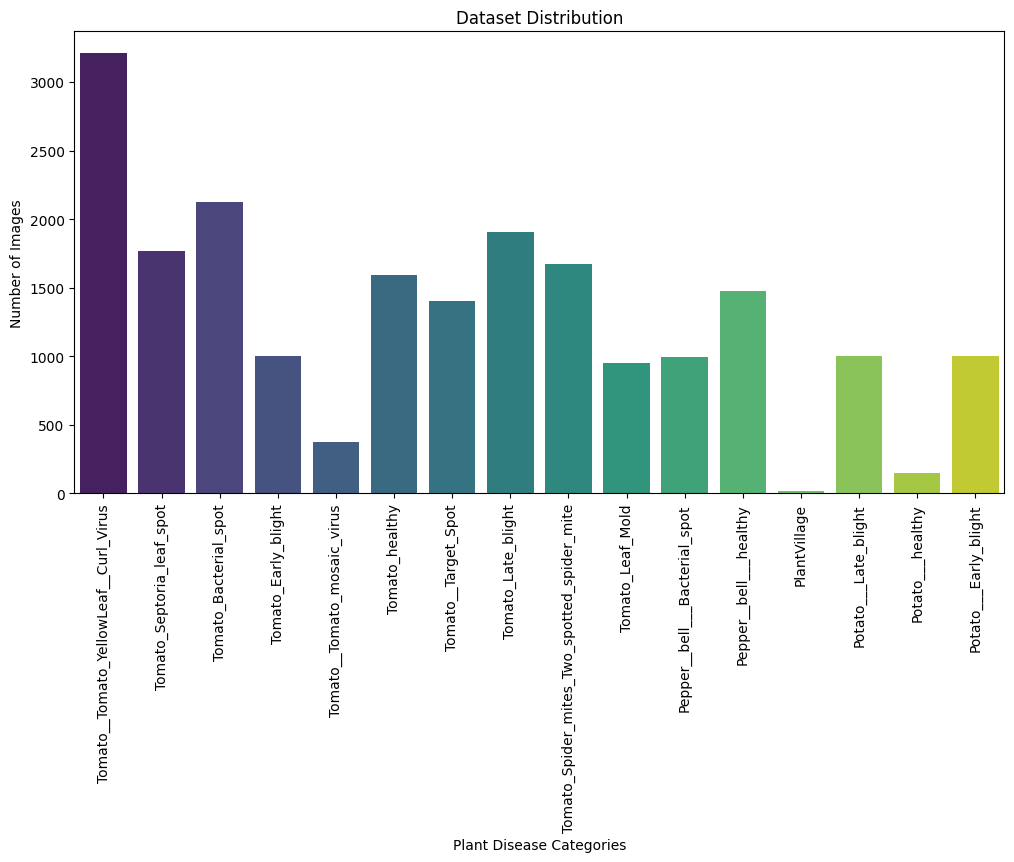

In [ ]:
import seaborn as sns

category_counts = {category: len(os.listdir(os.path.join(dataset_path, category))) for category in classes}

plt.figure(figsize=(12, 6))
sns.barplot(x=list(category_counts.keys()), y=list(category_counts.values()), hue=list(category_counts.keys()), palette="viridis", legend=False)
plt.xticks(rotation=90)
plt.xlabel("Plant Disease Categories")
plt.ylabel("Number of Images")
plt.title("Dataset Distribution")
plt.show()


### 4. Data Augmentation

<ipython-input-5-3afd013dce12>:11: UserWarning: Argument(s) 'alpha_affine' are not valid for transform ElasticTransform
  A.ElasticTransform(alpha=1, sigma=50, alpha_affine=50, p=0.5),


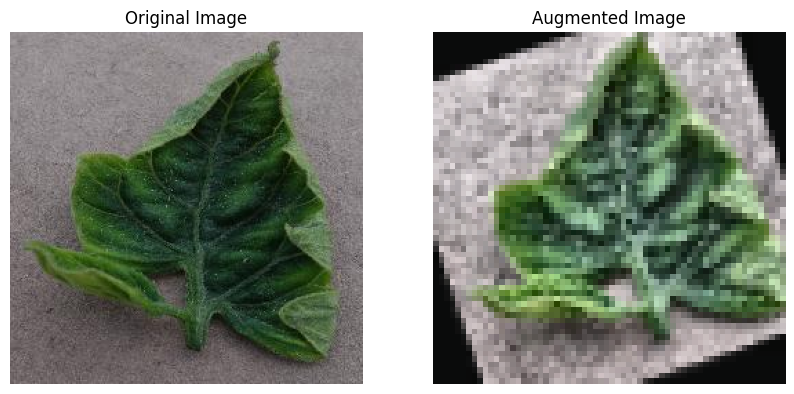

In [ ]:
import albumentations as A
from albumentations.pytorch import ToTensorV2
import cv2
import numpy as np
import matplotlib.pyplot as plt
transform = A.Compose([
    A.Resize(64, 64),
    A.RandomBrightnessContrast(p=0.8),
    A.Rotate(limit=45, p=0.8),
    A.HorizontalFlip(p=0.5),
    A.ElasticTransform(alpha=1, sigma=50, alpha_affine=50, p=0.5),
    A.CLAHE(clip_limit=4.0, p=0.5),
    A.Affine(scale=(0.9, 1.1), translate_percent=(0.1, 0.1), rotate=(-20, 20), shear=(-10, 10), p=0.7),
    A.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ToTensorV2()
])

def augment_and_show(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    transformed = transform(image=image)["image"]
    transformed_np = transformed.permute(1, 2, 0).numpy()
    transformed_np = transformed_np * np.array([0.229, 0.224, 0.225]) + np.array([0.485, 0.456, 0.406])
    transformed_np = np.clip(transformed_np, 0, 1)
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    ax[0].imshow(image)
    ax[0].set_title("Original Image")
    ax[0].axis("off")

    ax[1].imshow(transformed_np)
    ax[1].set_title("Augmented Image")
    ax[1].axis("off")

    plt.show()

sample_image_path = os.path.join(dataset_path, classes[0], os.listdir(os.path.join(dataset_path, classes[0]))[0])
augment_and_show(sample_image_path)


### 5. MLP-Mixer Model

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, LayerNormalization, Conv2D
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model

from tensorflow.keras.regularizers import l2

from tensorflow.keras.applications import ResNet50


def create_improved_mlp_mixer(input_shape=(64, 64, 3), num_classes=16):
    base_model = ResNet50(weights="imagenet", include_top=False, input_shape=input_shape)
    base_model.trainable = False

    x = GlobalAveragePooling2D()(base_model.output)
    x = Dense(512, activation="relu")(x)
    x = Dropout(0.4)(x)
    x = LayerNormalization()(x)

    for _ in range(8):
        x = Dense(256, activation="relu")(x)
        x = LayerNormalization()(x)

    outputs = Dense(num_classes, activation="softmax")(x)

    model = Model(inputs=base_model.input, outputs=outputs)
    return model

model_mlp = create_improved_mlp_mixer()
model_mlp.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 64, 64, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 70, 70, 3) │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 32, 32,    │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 32, 32,    │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 32, 32,    │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 34, 34,    │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 16, 16,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 16, 16,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 16, 16,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 16, 16,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 16, 16,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 16, 16,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 16, 16,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 16, 16,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 16, 16,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 16, 16,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 16, 16,    │      1,024 │ conv2_block1_3_c

 Total params: 25,237,904 (96.27 MB)

 Trainable params: 1,650,192 (6.29 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [ ]:
base_model = keras.applications.MobileNetV2(input_shape=(64, 64, 3), include_top=False, weights="imagenet")
base_model.trainable = False

<ipython-input-7-539f74ece70b>:1: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = keras.applications.MobileNetV2(input_shape=(64, 64, 3), include_top=False, weights="imagenet")


### 6. LSTM Model

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, LSTM, Dropout, Reshape, GlobalAveragePooling2D, Bidirectional
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model

from tensorflow.keras.regularizers import l2

from tensorflow.keras.regularizers import l2

def create_resnet_lstm_model(input_shape=(64, 64, 3), num_classes=16):
    inputs = keras.Input(shape=input_shape)
    base_model = ResNet50(weights="imagenet", include_top=False, input_tensor=inputs)
    base_model.trainable = True

    x = GlobalAveragePooling2D()(base_model.output)
    x = Reshape((1, -1))(x)
    x = Bidirectional(LSTM(128, activation="tanh", return_sequences=False, dropout=0.3))(x)
    x = Dense(128, activation="relu", kernel_regularizer=l2(0.001))(x)
    outputs = Dense(num_classes, activation="softmax")(x)

    model = Model(inputs=inputs, outputs=outputs)
    return model

model_lstm = create_resnet_lstm_model()
model_lstm.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 64, 64, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 70, 70, 3) │          0 │ input_layer_2[0]… │
│ (ZeroPadding2D)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 32, 32,    │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 32, 32,    │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 32, 32,    │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 34, 34,    │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 16, 16,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 16, 16,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 16, 16,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 16, 16,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 16, 16,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 16, 16,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 16, 16,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 16, 16,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 16, 16,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 16, 16,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 16, 16,    │      1,024 │ conv2_block1_3_c

 Total params: 25,851,920 (98.62 MB)

 Trainable params: 25,798,800 (98.41 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [ ]:
from tensorflow.keras.optimizers.schedules import CosineDecay
from tensorflow.keras.optimizers import Adam

lr_schedule = CosineDecay(initial_learning_rate=0.001, decay_steps=1000, alpha=0.0001)
optimizer = Adam(learning_rate=lr_schedule)

model_lstm.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])


In [ ]:
from tensorflow.keras.optimizers.schedules import CosineDecay
from tensorflow.keras.optimizers import Adam

lr_schedule = CosineDecay(initial_learning_rate=0.001, decay_steps=1000, alpha=0.0001)
optimizer = Adam(learning_rate=lr_schedule)

model_mlp.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])


In [ ]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.6/386.6 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.9/231.9 kB 22.6 MB/s eta 0:00:00


In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau

model_mlp.compile(optimizer=Adam(learning_rate=0.001), loss="categorical_crossentropy", metrics=["accuracy"])

lr_scheduler = ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=3, min_lr=1e-6)


In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
import numpy as np

y = np.array(y)
if len(y.shape) == 1:
    y = to_categorical(y, num_classes=num_classes)

y_labels = np.argmax(y, axis=1)

X_train, X_val, y_train_labels, y_val_labels = train_test_split(X, y_labels, test_size=0.2, random_state=42, stratify=y_labels)

y_train = to_categorical(y_train_labels, num_classes=num_classes)
y_val = to_categorical(y_val_labels, num_classes=num_classes)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)

X_train = np.array(X_train, dtype=np.float32)
y_train = np.array(y_train, dtype=np.float32)
X_val = np.array(X_val, dtype=np.float32)
y_val = np.array(y_val, dtype=np.float32)

def preprocess(image, label):
    image = tf.image.resize(image, (64, 64))
    image = image / 255.0
    return image, label

batch_size = 64

train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
train_dataset = train_dataset.shuffle(len(X_train)).batch(batch_size).prefetch(tf.data.AUTOTUNE)

val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val))
val_dataset = val_dataset.batch(batch_size).prefetch(tf.data.AUTOTUNE)


X_train shape: (16518, 64, 64, 3)
y_train shape: (16518, 16)
X_val shape: (4130, 64, 64, 3)
y_val shape: (4130, 16)


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)


In [ ]:
import optuna
from tensorflow.keras.optimizers import Adam

def objective(trial):
    lr = trial.suggest_float("lr", 1e-5, 1e-2, log=True)
    dropout_rate = trial.suggest_float("dropout_rate", 0.2, 0.5)

    model = create_resnet_lstm_model()
    model.compile(optimizer=Adam(lr), loss="categorical_crossentropy", metrics=["accuracy"])

    history = model.fit(train_dataset,validation_data=val_dataset, epochs=5, batch_size=32, verbose=0)

    return history.history["val_accuracy"][-1]

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=5)

print("Best hyperparameters:", study.best_params)


[I 2025-04-02 13:02:30,365] A new study created in memory with name: no-name-fbd24ab8-f5cd-4e3c-8034-f9af4b7efea9
[I 2025-04-02 13:06:13,505] Trial 0 finished with value: 0.9622275829315186 and parameters: {'lr': 0.00011662948091168704, 'dropout_rate': 0.23616419608688136}. Best is trial 0 with value: 0.9622275829315186.
[I 2025-04-02 13:09:38,255] Trial 1 finished with value: 0.9663438200950623 and parameters: {'lr': 2.6170504172307085e-05, 'dropout_rate': 0.48552458881620136}. Best is trial 1 with value: 0.9663438200950623.
[I 2025-04-02 13:13:05,859] Trial 2 finished with value: 0.9554479122161865 and parameters: {'lr': 1.7580352761728958e-05, 'dropout_rate': 0.49689303009384084}. Best is trial 1 with value: 0.9663438200950623.
[I 2025-04-02 13:16:35,102] Trial 3 finished with value: 0.3871670663356781 and parameters: {'lr': 0.005239987214869331, 'dropout_rate': 0.4937183278788331}. Best is trial 1 with value: 0.9663438200950623.
[I 2025-04-02 13:20:02,237] Trial 4 finished with val

Best hyperparameters: {'lr': 2.6170504172307085e-05, 'dropout_rate': 0.48552458881620136}


In [ ]:
from sklearn.model_selection import StratifiedKFold

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for train_index, val_index in kf.split(X, y.argmax(axis=1)):
    train_dataset, val_dataset_dataset = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]


In [ ]:
# Re-create the train_dataset after k-fold split to make it a tf.data.Dataset again
train_dataset = tf.data.Dataset.from_tensor_slices((X[train_index], y[train_index]))
train_dataset = train_dataset.shuffle(len(X[train_index])).batch(batch_size).prefetch(tf.data.AUTOTUNE)

# Print batch shape
for data, labels in train_dataset.take(1):
    print("Train batch shape:", data.shape, labels.shape)

# Print validation batch shape (assuming val_dataset is already a tf.data.Dataset)
for data, labels in val_dataset.take(1):
    print("Validation batch shape:", data.shape, labels.shape)

Train batch shape: (64, 64, 64, 3) (64, 16)
Validation batch shape: (64, 64, 64, 3) (64, 16)


In [ ]:
import optuna

def objective(trial):
    lr = trial.suggest_float("lr", 1e-5, 1e-2, log=True)
    dropout_rate = trial.suggest_float("dropout", 0.2, 0.5)

    model = create_improved_mlp_mixer()
    model.compile(optimizer=Adam(learning_rate=lr), loss="categorical_crossentropy", metrics=["accuracy"])

    history = model.fit(train_dataset, validation_data=val_dataset, epochs=5, batch_size=32, verbose=0)

    if history.history["val_accuracy"] is None:
        return float("-inf")

    return history.history["val_accuracy"][-1]

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=5)
print("Best hyperparameters:", study.best_params)


[I 2025-04-02 13:20:42,694] A new study created in memory with name: no-name-a03d6062-8126-46bf-bfcb-a72365c1ab0b
[I 2025-04-02 13:21:47,062] Trial 0 finished with value: 0.8934624791145325 and parameters: {'lr': 0.0002872640250526148, 'dropout': 0.46502345143395507}. Best is trial 0 with value: 0.8934624791145325.
[I 2025-04-02 13:22:40,445] Trial 1 finished with value: 0.15544794499874115 and parameters: {'lr': 0.008251072829662023, 'dropout': 0.29599865269417713}. Best is trial 0 with value: 0.8934624791145325.
[I 2025-04-02 13:23:33,880] Trial 2 finished with value: 0.8760290741920471 and parameters: {'lr': 0.00014958774185954595, 'dropout': 0.2508635858123175}. Best is trial 0 with value: 0.8934624791145325.
[I 2025-04-02 13:24:31,863] Trial 3 finished with value: 0.9033898115158081 and parameters: {'lr': 0.00026380063924785486, 'dropout': 0.2963757165813859}. Best is trial 3 with value: 0.9033898115158081.
[I 2025-04-02 13:25:26,619] Trial 4 finished with value: 0.661985456943512

Best hyperparameters: {'lr': 0.00026380063924785486, 'dropout': 0.2963757165813859}


In [ ]:
from sklearn.svm import SVC
svm_classifier = SVC(kernel="rbf", C=10, gamma=0.1)

# Extract predictions from both models
mlp_predictions = model_mlp.predict(train_dataset)
lstm_predictions = model_lstm.predict(train_dataset)

# Concatenate features from both models
ensemble_features = np.concatenate([mlp_predictions, lstm_predictions], axis=1)

# Train SVM on concatenated features
svm_classifier.fit(ensemble_features, y_train.argmax(axis=1))


259/259 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step
259/259 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step


SVC(C=10, gamma=0.1)

In [ ]:
test_mlp_predictions = model_mlp.predict(val_dataset)
test_lstm_predictions = model_lstm.predict(val_dataset)

ensemble_test_features = np.concatenate([test_mlp_predictions, test_lstm_predictions], axis=1)
final_predictions = svm_classifier.predict(ensemble_test_features)


65/65 ━━━━━━━━━━━━━━━━━━━━ 10s 93ms/step
65/65 ━━━━━━━━━━━━━━━━━━━━ 5s 51ms/step


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)


In [ ]:
from tensorflow.keras.optimizers import Adam

# Compile models
model_mlp.compile(optimizer=Adam(learning_rate=0.001), loss="categorical_crossentropy", metrics=["accuracy"])
model_lstm.compile(optimizer=Adam(learning_rate=0.001), loss="categorical_crossentropy", metrics=["accuracy"])

# Train models
history_mlp = model_mlp.fit(train_dataset, validation_data=val_dataset, epochs=10, batch_size=32)
history_lstm = model_lstm.fit(train_dataset,validation_data=val_dataset, epochs=10, batch_size=32)

Epoch 1/10
259/259 ━━━━━━━━━━━━━━━━━━━━ 64s 68ms/step - accuracy: 0.9420 - loss: 0.1882 - val_accuracy: 0.9576 - val_loss: 0.1319
Epoch 2/10
259/259 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - accuracy: 0.9504 - loss: 0.1609 - val_accuracy: 0.9695 - val_loss: 0.1144
Epoch 3/10
259/259 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.9499 - loss: 0.1518 - val_accuracy: 0.9584 - val_loss: 0.1378
Epoch 4/10
259/259 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.9476 - loss: 0.1612 - val_accuracy: 0.9678 - val_loss: 0.1128
Epoch 5/10
259/259 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.9533 - loss: 0.1466 - val_accuracy: 0.9792 - val_loss: 0.0884
Epoch 6/10
259/259 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.9591 - loss: 0.1313 - val_accuracy: 0.9738 - val_loss: 0.1005
Epoch 7/10
259/259 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.9621 - loss: 0.1220 - val_accuracy: 0.9758 - val_loss: 0.0930
Epoch 8/10
259/259 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.9647 - loss: 0.1180 - val_acc

### 7. Mlp-Mixer Model and LSTM Model accuracy and loss curves

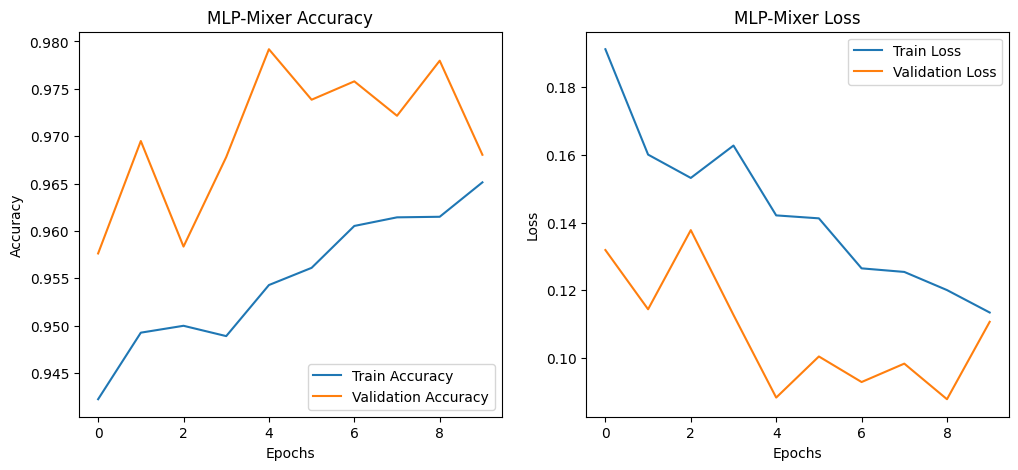

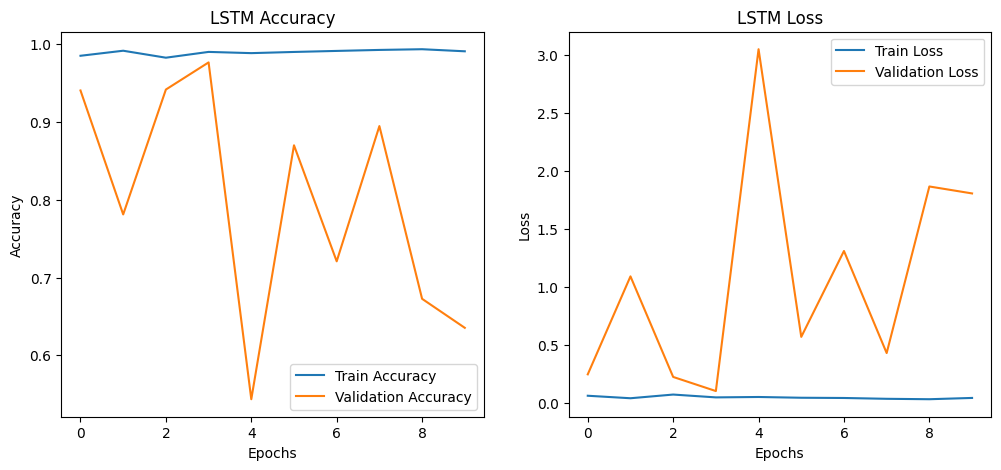

In [ ]:
import matplotlib.pyplot as plt

def plot_training_results(history, model_name):
    plt.figure(figsize=(12, 5))

    # Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title(f'{model_name} Accuracy')
    plt.legend()

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f'{model_name} Loss')
    plt.legend()

    plt.show()
# Calling the correct function name: plot_training_results
plot_training_results(history_mlp, "MLP-Mixer")
plot_training_results(history_lstm, "LSTM")

### 8. Confusion Matrix

65/65 ━━━━━━━━━━━━━━━━━━━━ 10s 88ms/step


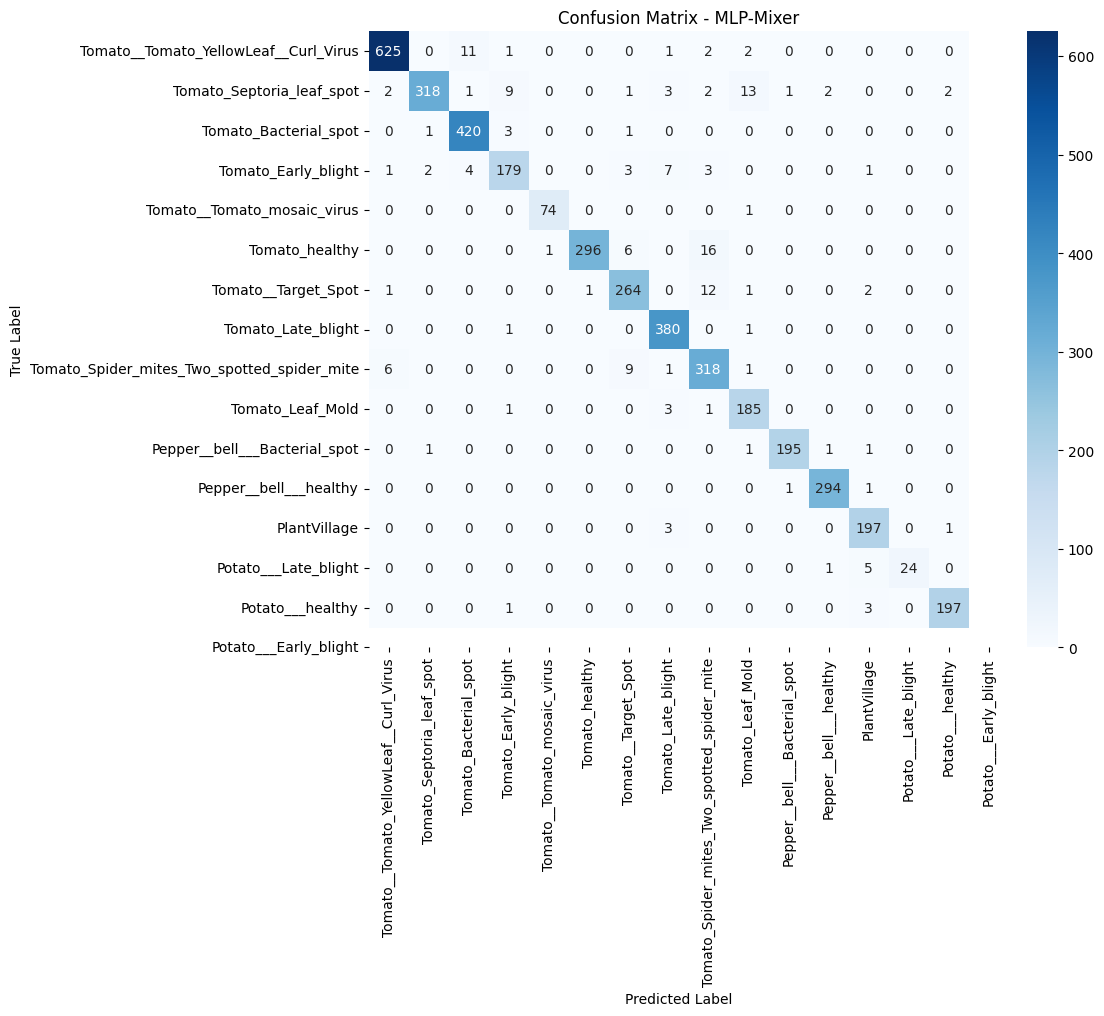

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, class_names, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()

y_pred_mlp = np.argmax(model_mlp.predict(val_dataset), axis=1)  # Get predicted labels
plot_confusion_matrix(y_val_labels, y_pred_mlp, classes, "MLP-Mixer")


### 9. ROC Curves

65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


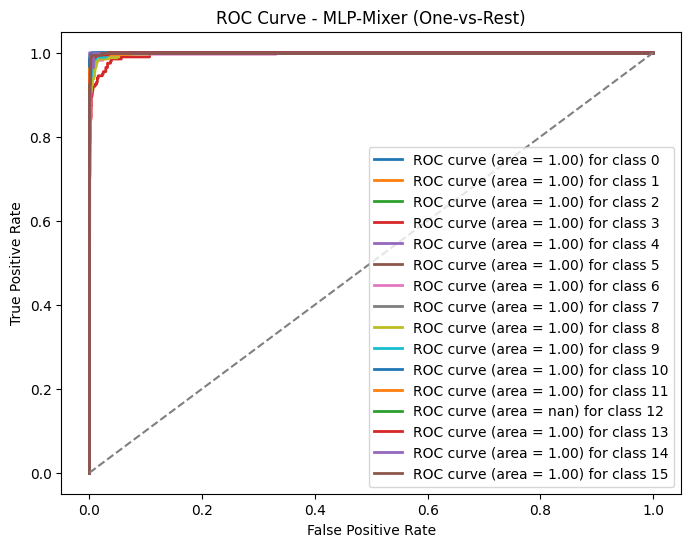

65/65 ━━━━━━━━━━━━━━━━━━━━ 5s 53ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


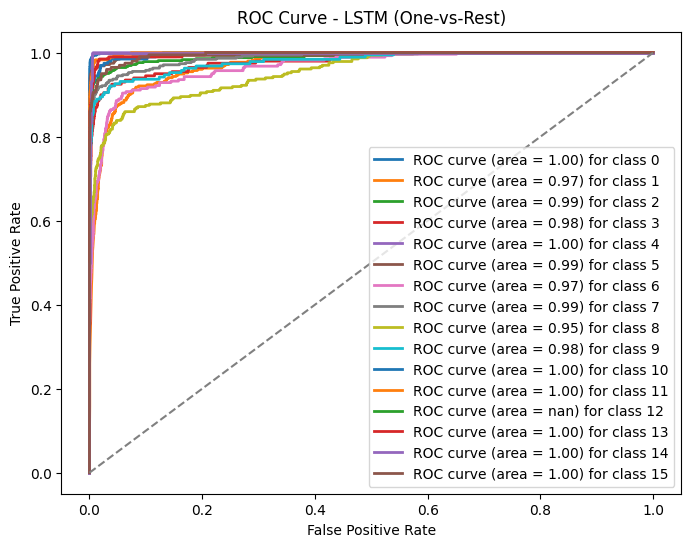

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

def plot_roc_curve(y_true, y_pred_probs, model_name, num_classes):
    # Binarize the true labels
    y_true_bin = label_binarize(y_true, classes=range(num_classes))

    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(num_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_pred_probs[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot all ROC curves
    plt.figure(figsize=(8, 6))
    for i in range(num_classes):
        plt.plot(fpr[i], tpr[i], lw=2, label=f'ROC curve (area = {roc_auc[i]:.2f}) for class {i}')

    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {model_name} (One-vs-Rest)')
    plt.legend(loc="lower right")
    plt.show()

y_pred_probs_mlp = model_mlp.predict(val_dataset)
plot_roc_curve(y_val_labels, y_pred_probs_mlp, "MLP-Mixer", num_classes)

# For LSTM:
y_pred_probs_lstm = model_lstm.predict(val_dataset)
plot_roc_curve(y_val_labels, y_pred_probs_lstm, "LSTM", num_classes)